In [96]:
import os
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.utils.extmath import softmax
from sklearn.inspection import permutation_importance
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [97]:
# Helper function to extract data from text files
def load_data(file_pattern):
    data = []
    record_ids = []
    for root, _, files in os.walk("../process/PROCESS-V1/"):
        for file in files:
            if re.match(file_pattern, file):
                with open(os.path.join(root, file), "r", encoding="utf-8") as f:
                    data.append(f.read())
                # Extract record ID from the file path
                match = re.search(r'(Process-rec-\d{3})', file)
                if match:
                    record_ids.append(match.group(1))
    return data, record_ids

In [98]:
# Helper function to load MMSE labels
def load_labels(label_file):
    df = pd.read_csv(label_file)
    df['label'] = df['Class']  # Verwende die Klasse direkt aus der Spalte 'Class'
    label_map = df.set_index('Record-ID')['label'].to_dict()
    return label_map

In [99]:
# Feature engineering: Identify repetitive patterns and calculate timing features
def find_repetitions_and_timing(text):
    return {
        'text': text
    }

# Apply feature extraction to the dataset
def extract_features(texts):
    feature_list = [find_repetitions_and_timing(text) for text in texts]
    features_df = pd.DataFrame(feature_list)
    print("Extracted features:")
    print(features_df.head())  # Output intermediate features for verification
    return features_df


In [100]:
# Load the MMSE labels
label_file = "../process/PROCESS-V1/dem-info.csv"
labels = load_labels(label_file)

# Load the data
file_pattern = r"Process-rec-\d+__CTD\.txt"
data, record_ids = load_data(file_pattern)

In [101]:
# Map labels to data
y = [labels.get(record_id, 0) for record_id in record_ids]  # Default to 0 (Not affected) if no label exists

if not data or not y:
    raise ValueError("No matching data or labels found. Check your file paths or label mapping.")

In [102]:
# Split data and labels into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Split record IDs to match the test data
_, test_record_ids = train_test_split(record_ids, test_size=0.2, random_state=42)


In [103]:
# Extract features
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

Extracted features:
                                                text
0  Pat: (6 seconds) There’s a little boy getting ...
1  Pat: Kids, kids getting into the cookie jar; t...
2  Pat: There is a woman washing up, the sink is ...
3  Pat: OK, this looks like er (1 second) a poste...
4  Pat: (5 seconds) There is a girl exclaiming (1...
Extracted features:
                                                text
0  Pat: Er, a boy passing a little girl something...
1  Pat: (2 seconds) You have a mother (sighs) was...
2  Pat: This looks like a picture taking place in...
3  Pat: (5 seconds) So there’s a, it appears that...
4  Pat: Um, in this picture it’s er a kitchen sce...


In [104]:


# Create a simple ML pipeline with Naive Bayes as baseline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))),  # Optional if text is directly used
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [105]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier(random_state=42))])

In [106]:
# Load the MMSE labels
label_file = "../process/PROCESS-V1/dem-info.csv"
labels = load_labels(label_file)

# Load the data
file_pattern = r"Process-rec-\d+__CTD\.txt"
data, record_ids = load_data(file_pattern)


Vectorized Test Data Range: 0.0 0.47828317301333306
              precision    recall  f1-score   support

    Dementia       0.00      0.00      0.00         2
          HC       0.59      0.65      0.62        20
         MCI       0.20      0.20      0.20        10

    accuracy                           0.47        32
   macro avg       0.26      0.28      0.27        32
weighted avg       0.43      0.47      0.45        32



C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarnin

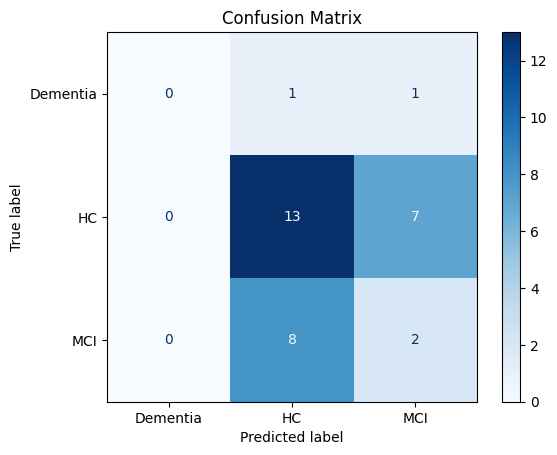

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Pat: So there is a lady, I’m assuming the mother, she is washing dishes\nwhilst the sink is overflowing and the water is falling over the counter\ntops, over the sink onto the floor; she is stepping in the puddle of\nwater. Er and there is a kid on a stool trying to get the cookie jar\nfrom the open cupboard, er it seems like as though he is falling over\nbecause the stool is falling over. He has a cookie in his hand and he\nhas his other hand in the cookie jar. And then there is a girl, who is\nprobably his sister, trying to get the cookie from him, and she is also\nlaughing.\n'

--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Stefa\OneDrive\Dokumente\_Studium\Master\Semester 2\Speech and Language Processing\Git PSTA\SLP\venv\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Pat: (6 seconds) There’s a little boy getting into the cupboard; um he’s climbed on a stool and is falling off. He’s trying to get the cookie jar. Um, his sister’s waiting for a cookie to be passed down. Um, the mum is drying the pots but she’s left the sink on and the water’s overflowing. There’s pots on the side. Um (1 second) you can see out into the garden. Um (1 second) mum looks too busy to be seeing what the children are doing.\n'


In [107]:


# Predict on test data
y_pred = pipeline.predict(X_test)

# Check the range of vectorized test data
vectorized_test = pipeline.named_steps['vectorizer'].transform(X_test)
print("Vectorized Test Data Range:", vectorized_test.min(), vectorized_test.max())


# Get prediction probabilities with corrected scaling
log_probabilities = pipeline.named_steps['classifier'].predict_log_proba(pipeline.named_steps['vectorizer'].transform(X_test))
probabilities = softmax(pipeline.named_steps['classifier'].predict_log_proba(pipeline.named_steps['vectorizer'].transform(X_test)))


# Evaluate the model
print(classification_report(y_test, y_pred))

# Save features for debugging
X_train_features['label'] = y_train
X_test_features['label'] = y_test

# Save processed data for review
X_train_features.to_csv("CTD-train_features.csv", index=False)
X_test_features.to_csv("CTD-test_features.csv", index=False)

# Save predictions and scores for review
predictions_with_scores_df = pd.DataFrame({
    'record_id': test_record_ids,
    'text': X_test,
    'true_label': y_test,
    'predicted_label': y_pred,
    'score_0': probabilities[:, 0],
    'score_1': probabilities[:, 1]
})

predictions_with_scores_df.to_csv("CTD-predictions_with_scores_NaiveBayes.csv", index=False)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
